# Analysis of Video Games Sales and Reviews 

Importing the dataset and necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('video_games_sales2025.csv')

Initial exploration

In [3]:
df.head(5) # First 5 rows
df.tail(5) # Last 5 rows

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
89613,2115110,Outrun Them,2024-02-29,0,3.99,0,The name of the game is literally the game. Ou...,The name of the game is literally the game. Ou...,It's all in the name.. outrun them.,NaN,...,0,0,0,0,0,"{'2D Platformer': 91, 'Runner': 85, 'Platforme...",-1,-1,-1,-1
89614,1174200,Lands of Pharaoh: Episode 1,2020-01-07,0,10.00,0,Join Our Discord Channel About the Game Briefl...,Briefly: Lands of Pharaoh is a third person vi...,Lands of Pharaoh is a multi-camera-angle based...,NaN,...,0,0,0,0,0,"{'Action': 43, 'Adventure': 41, 'Indie': 41, '...",-1,-1,-1,-1
89615,1160190,Player One,2019-10-10,0,1.99,0,Player One is a new 3D game where you take con...,Player One is a new 3D game where you take con...,"3D Game, Thirdperson Platformer",NaN,...,0,0,0,0,0,"{'Indie': 31, 'Early Access': 21}",-1,-1,-1,-1
89616,3380340,DragonRoad,2025-01-25,0,29.99,0,"This is an open world game on 3D, also a m...","This is an open world game on 3D, also a m...","This is an open world game on 3D, Also a missi...",NaN,...,0,0,0,0,0,"{'RPG': 117, 'Action-Adventure': 111, 'Strateg...",-1,-1,-1,-1
89617,763730,Ragtag Adventurers,2018-03-01,0,9.99,0,Ragtag Adventurers is a Boss Rush game that pi...,Ragtag Adventurers is a Boss Rush game that pi...,Ragtag Adventurers is a boss rush game that pi...,NaN,...,0,0,0,0,0,"{'Action': 22, 'Indie': 21}",-1,-1,-1,-1


In [4]:
df.info() # Basic info
df.describe(include='all') # Statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   detailed_description      89421 non-null  object 
 7   about_the_game            89398 non-null  object 
 8   short_description         89498 non-null  object 
 9   reviews                   10401 non-null  object 
 10  header_image              89618 non-null  object 
 11  website                   41114 non-null  object 
 12  support_url               44110 non-null  object 
 13  support_email             78798 non-null  object 
 14  window

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.961800e+04,89618,89618,89618.000000,89618.000000,89618.000000,89421,89398,89498,10401,...,89618.000000,8.961800e+04,89618.000000,89618.000000,8.961800e+04,89618,89618.000000,8.961800e+04,89618.000000,89618.000000
unique,NaN,88899,4459,NaN,NaN,NaN,89075,89040,88586,10291,...,NaN,NaN,NaN,NaN,NaN,70420,NaN,NaN,NaN,NaN
top,NaN,Alone,2024-10-31,NaN,NaN,NaN,Help the beautiful girls to immerse themselves...,Help the beautiful girls to immerse themselves...,Find the objects that are hidden on the map.,“ ” Read more on PC Gamer,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
freq,NaN,6,141,NaN,NaN,NaN,58,58,50,21,...,NaN,NaN,NaN,NaN,NaN,16872,NaN,NaN,NaN,NaN
mean,1.656904e+06,NaN,NaN,0.183624,7.309623,0.595583,NaN,NaN,NaN,NaN,...,5.032694,1.147559e+02,5.301814,4.558627,9.833994e+01,NaN,45.352418,1.315490e+03,5.231639,15.584581
std,9.168390e+05,NaN,NaN,1.725594,13.331073,15.351920,NaN,NaN,NaN,NaN,...,181.100334,8.806711e+03,189.591095,16.538036,5.717544e+03,NaN,40.685695,3.542370e+04,22.335358,444.277307
min,2.000000e+01,NaN,NaN,-1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,8.550525e+05,NaN,NaN,0.000000,0.990000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.524730e+06,NaN,NaN,0.000000,4.990000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,60.000000,1.500000e+01,-1.000000,-1.000000
75%,2.430852e+06,NaN,NaN,0.000000,9.990000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,84.000000,8.100000e+01,-1.000000,-1.000000


#### Data Preprocessing

In [5]:
# NORMALIZE COLUMN NAMES 
orig_cols = df.columns.tolist()
clean_cols = {}

for c in orig_cols:
    c_new = c.strip()
    c_new = c_new.replace("(in $)","").replace("(support: TRUE or FALSE values)","")
    c_new = c_new.replace(" ", "_").replace("-", "_").replace("(","").replace(")","")
    c_new = c_new.replace("/", "_").replace("__","_")
    c_new = c_new.lower()
    clean_cols[c] = c_new

df = df.rename(columns=clean_cols)

# Additional known name corrections
rename_map = {
    "reccomendations": "recommendations",
    "num_revirews_recent": "num_reviews_recent",
    "estimated_owner": "estimated_owners",
    "estimated_owners": "estimated_owners",
}
df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns}, inplace=True)

print("Cleaned Columns:", df.columns.tolist())


Cleaned Columns: ['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count', 'detailed_description', 'about_the_game', 'short_description', 'reviews', 'header_image', 'website', 'support_url', 'support_email', 'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url', 'achievements', 'recommendations', 'notes', 'supported_languages', 'full_audio_languages', 'packages', 'developers', 'publishers', 'categories', 'genres', 'screenshots', 'movies', 'user_score', 'score_rank', 'positive', 'negative', 'estimated_owners', 'average_playtime_forever', 'average_playtime_2weeks', 'median_playtime_forever', 'median_playtime_2weeks', 'discount', 'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent']


In [6]:
# Detect important columns

col_map = {
    "game_name": next((c for c in df.columns if c=="name" or ("game" in c and "name" in c)), None),
    "release_date": next((c for c in df.columns if "release" in c and "date" in c), None),
    "required_age": next((c for c in df.columns if "required_age" in c), None),
    "price": next((c for c in df.columns if c=="price" or "price" in c), None),
    "dlc_count": next((c for c in df.columns if "dlc" in c and "count" in c), None),
    "metacritic_score": next((c for c in df.columns if "metacritic" in c), None),
    "achievements": next((c for c in df.columns if "achievement" in c), None),
    "developer": next((c for c in df.columns if "developer" in c), None),
    "publisher": next((c for c in df.columns if "publisher" in c), None),
    "categories": next((c for c in df.columns if "category" in c), None),
    "genres": next((c for c in df.columns if "genre" in c), None),
    "positive": next((c for c in df.columns if c=="positive" or "positive" in c), None),
    "negative": next((c for c in df.columns if c=="negative" or "negative" in c), None),
    "estimated_owners": next((c for c in df.columns if "estimated_owner" in c or "estimated_owners" in c), None),
    "avg_playtime": next((c for c in df.columns if "average_playtime" in c or "avg_playtime" in c), None),
    "median_playtime": next((c for c in df.columns if "median_playtime" in c), None),
    "peak_ccu": next((c for c in df.columns if "peak" in c and "ccu" in c), None),
    "pct_pos_total": next((c for c in df.columns if "pct_pos_total" in c), None),
    "num_reviews_total": next((c for c in df.columns if "num_reviews_total" in c or ("num" in c and "total" in c)), None),
    "pct_pos_recent": next((c for c in df.columns if "pct_pos_recent" in c), None),
    "num_reviews_recent": next((c for c in df.columns if "num_reviews_recent" in c or "num_revirews_recent" in c), None),
    "windows": next((c for c in df.columns if c.startswith("windows") or c=="windows"), None),
    "mac": next((c for c in df.columns if "mac"==c or c.startswith("mac")), None),
    "linux": next((c for c in df.columns if "linux"==c or c.startswith("linux")), None)
}

print("Detected Columns:")
for k,v in col_map.items():
    print(f"{k}: {v}")


Detected Columns:
game_name: name
release_date: release_date
required_age: required_age
price: price
dlc_count: dlc_count
metacritic_score: metacritic_score
achievements: achievements
developer: developers
publisher: publishers
categories: None
genres: genres
positive: positive
negative: negative
estimated_owners: estimated_owners
avg_playtime: average_playtime_forever
median_playtime: median_playtime_forever
peak_ccu: peak_ccu
pct_pos_total: pct_pos_total
num_reviews_total: num_reviews_total
pct_pos_recent: pct_pos_recent
num_reviews_recent: num_reviews_recent
windows: windows
mac: mac
linux: linux


In [7]:
# Converting release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

df[['min_owners','max_owners']] = (
    df['estimated_owners']
      .str.replace(',', '')             # remove commas
      .str.split('-', expand=True)      # split into two columns
      .astype(int))

df['avg_owners'] = (df['min_owners'] + df['max_owners']) / 2

# Create rating ratio
df['rating'] = df['positive'] / (df['positive'] + df['negative'])
df['rating'] = df['rating'].fillna(0)


Data cleaning

In [8]:
# Clean a& Convert columns

# Release date → datetime → year
if col_map["release_date"]:
    df[col_map["release_date"]] = pd.to_datetime(df[col_map["release_date"]], errors='coerce')
    df['year'] = df[col_map["release_date"]].dt.year
else:
    df['year'] = np.nan

# Price parsing
def parse_price(x):
    try:
        if pd.isna(x):
            return np.nan
        s = str(x).lower().strip()
        if s in ("free","0","none","nan"):
            return 0.0
        s = s.replace("$","").replace(",","").replace("usd","").strip()
        return float(s)
    except:
        return np.nan

df['price_usd'] = df[col_map["price"]].apply(parse_price) if col_map["price"] else np.nan

# Convert review columns
for col in ("positive","negative"):
    if col_map[col]:
        df[col] = pd.to_numeric(df[col_map[col]], errors='coerce')
    else:
        df[col] = np.nan

# Total reviews
if col_map["num_reviews_total"]:
    df['num_reviews_total'] = pd.to_numeric(df[col_map["num_reviews_total"]], errors='coerce')
else:
    df['num_reviews_total'] = df['positive'].fillna(0) + df['negative'].fillna(0)

# Recent reviews
if col_map["num_reviews_recent"]:
    df['num_reviews_recent'] = pd.to_numeric(df[col_map["num_reviews_recent"]], errors='coerce')
else:
    df['num_reviews_recent'] = np.nan

# pct_pos_total
if col_map["pct_pos_total"]:
    df['pct_pos_total'] = pd.to_numeric(df[col_map["pct_pos_total"]], errors='coerce')
else:
    df['pct_pos_total'] = (df['positive'] / df['num_reviews_total']).replace([np.inf,-np.inf],np.nan).fillna(0)*100

# pct_pos_recent
if col_map["pct_pos_recent"]:
    df['pct_pos_recent'] = pd.to_numeric(df[col_map["pct_pos_recent"]], errors='coerce')
else:
    df['pct_pos_recent'] = np.nan

# Estimated owners
df['estimated_owners'] = pd.to_numeric(df[col_map["estimated_owners"]], errors='coerce') if col_map["estimated_owners"] else np.nan

# Metacritic
df['metacritic_score'] = pd.to_numeric(df[col_map["metacritic_score"]], errors='coerce') if col_map["metacritic_score"] else np.nan

# Platform booleans
df['windows_support'] = df[col_map["windows"]].astype(str).str.lower().isin(["true","1","yes","y"]) if col_map["windows"] else False
df['mac_support'] = df[col_map["mac"]].astype(str).str.lower().isin(["true","1","yes","y"]) if col_map["mac"] else False
df['linux_support'] = df[col_map["linux"]].astype(str).str.lower().isin(["true","1","yes","y"]) if col_map["linux"] else False

# Playtime
df['average_playtime_forever'] = pd.to_numeric(df[col_map["avg_playtime"]], errors='coerce') if col_map["avg_playtime"] else np.nan
df['median_playtime_forever'] = pd.to_numeric(df[col_map["median_playtime"]], errors='coerce') if col_map["median_playtime"] else np.nan

df.drop_duplicates(inplace=True)
print("Shape after parsing:", df.shape)


Shape after parsing: (89618, 56)


Data Binning

In [9]:
# Price bins
price_series = df['price_usd']

if price_series.dropna().shape[0] < 10:
    df['price_bin'] = pd.cut(price_series.fillna(0), bins=[-1,0,10,30,60,100,1000],
        labels=['Free','<=10','10-30','30-60','60-100','>100'])
else:
    try:
        df['price_bin'] = pd.qcut(price_series, [0,0.25,0.5,0.75,0.95,1.0],
            labels=['Q1','Q2','Q3','Q4','Top5%'])
    except:
        df['price_bin'] = pd.cut(price_series.fillna(0), bins=[-1,0,10,30,60,100,1000],
            labels=['Free','<=10','10-30','30-60','60-100','>100'])

# DLC bins
df['dlc_count'] = pd.to_numeric(df[col_map["dlc_count"]], errors='coerce').fillna(0).astype(int) if col_map["dlc_count"] else 0
df['dlc_bin'] = pd.cut(df['dlc_count'], [-1,0,2,5,20,500],
                       labels=['No DLC','1-2','3-5','6-20','20+'])

# Year to decade
df['decade'] = (df['year'] // 10 * 10).astype("Int64")


In [10]:
# Derived Metrics 
df['mostly_positive'] = df['pct_pos_total'] > 70
df['owners_per_dollar'] = df['estimated_owners'] / df['price_usd'].replace(0,np.nan)
df['playtime_per_dollar'] = df['average_playtime_forever'] / df['price_usd'].replace(0,np.nan)

# genres
if col_map['genres']:
    df['genres_list'] = df[col_map['genres']].astype(str).str.split(r"[;,\|\/]")
    df['genres_list'] = df['genres_list'].apply(lambda x: [i.strip() for i in x] if isinstance(x,list) else [])
    df_exploded_genres = df.explode("genres_list").rename(columns={'genres_list':'genre'})
else:
    df_exploded_genres = df.copy()
    df_exploded_genres['genre'] = np.nan

print("Exploded genres:", df_exploded_genres['genre'].nunique())


Exploded genres: 108


### Visualization

#### Helper Plot

In [11]:
# Helper Function

def save_and_show(fig, fname):
    path = fig_dir / fname
    fig.tight_layout()
    fig.savefig(path)
    plt.show()
    print("Saved:", path)


In [12]:
from pathlib import Path

# Create directory for saving figures
fig_dir = Path('figures')
fig_dir.mkdir(exist_ok=True)

print(f"✓ Figures directory created at: {fig_dir.absolute()}")

✓ Figures directory created at: d:\Projects\EDA-Case-Studies\Video Game Sales & Reviews Analysis\figures


#### Best-Selling Genres

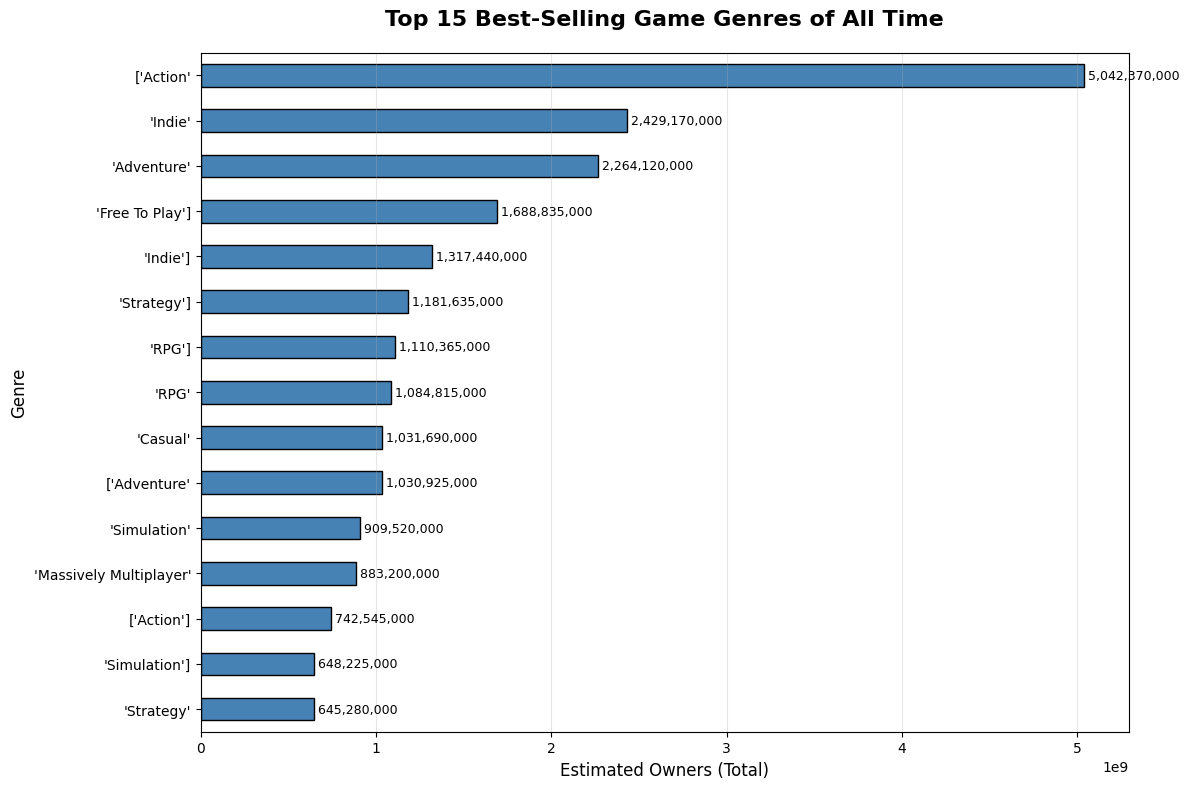


Summary:
Total unique genres: 108
Top genre: ['Action' with 5,042,370,000 estimated owners
Games in top genre: 34,225
Average positive rating in top genre: 44.3%


In [12]:
# Best-selling Genres 

# Group and aggregate genre data (using avg_owners which has actual numeric values)
g = (df_exploded_genres
     .groupby('genre')
     .agg(num_games=('name','count'),
          sum_owners=('avg_owners','sum'),
          avg_pct_pos=('pct_pos_total','mean'))
     .sort_values('sum_owners', ascending=False)
     .head(15))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
g['sum_owners'].plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')

# Formatting
ax.set_title("Top 15 Best-Selling Game Genres of All Time", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Estimated Owners (Total)", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(g['sum_owners']):
    ax.text(v, i, f' {v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(fig_dir/"Top `15 best-selling game Genres if all time.png", dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nSummary:")
print(f"Total unique genres: {df_exploded_genres['genre'].nunique()}")
print(f"Top genre: {g.index[0]} with {g['sum_owners'].iloc[0]:,.0f} estimated owners")
print(f"Games in top genre: {g['num_games'].iloc[0]:,}")
print(f"Average positive rating in top genre: {g['avg_pct_pos'].iloc[0]:.1f}%")

#### Top Publishers (of Steam)

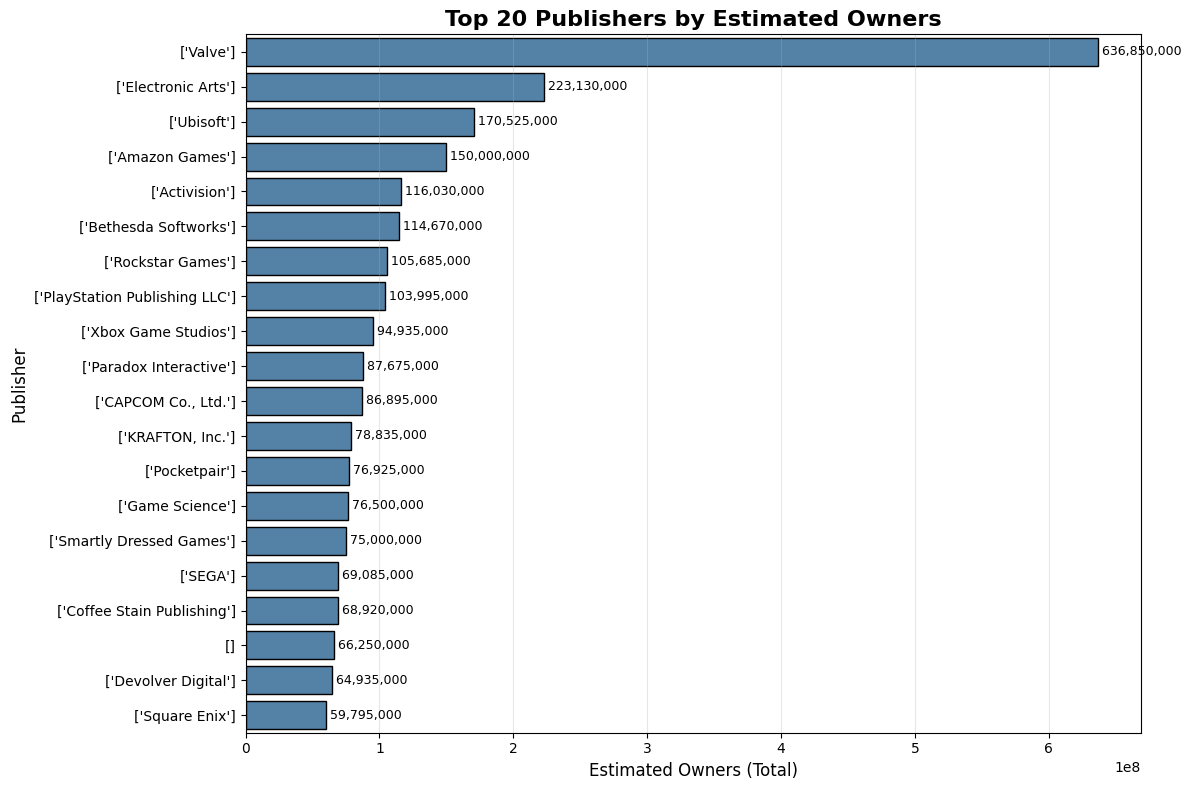


Top 5 Publishers Data:
                     num_games   sum_owners  avg_pct_pos  avg_playtime
publishers                                                            
['Valve']                   15  636850000.0    85.800000   6530.133333
['Electronic Arts']         98  223130000.0    75.408163    952.826531
['Ubisoft']                104  170525000.0    72.192308    703.336538
['Amazon Games']             3  150000000.0    69.000000   4977.666667
['Activision']              54  116030000.0    75.944444    324.537037


In [13]:
# Top Publishers
# We use 'name' instead of 'game_name' and 'avg_owners' instead of 'estimated_owners'
# We use 'publishers' instead of 'publisher'
pub = (df.groupby('publishers')
       .agg(num_games=('name','count'),
            sum_owners=('avg_owners','sum'),
            avg_pct_pos=('pct_pos_total','mean'),
            avg_playtime=('average_playtime_forever','mean'))
       .dropna(subset=['sum_owners'])
       .sort_values('sum_owners', ascending=False)
       .head(20))

# Create plot
plt.figure(figsize=(12,8))
sns.barplot(x=pub['sum_owners'], y=pub.index, color='steelblue', edgecolor='black')
plt.title("Top 20 Publishers by Estimated Owners", fontsize=16, fontweight='bold')
plt.xlabel("Estimated Owners (Total)", fontsize=12)
plt.ylabel("Publisher", fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(pub['sum_owners']):
    plt.text(v, i, f' {v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(fig_dir/"Top Publishers.png")
plt.show()

print("\nTop 5 Publishers Data:")
print(pub.head(5))

#### Critic Score (metacritic) vs Sales 

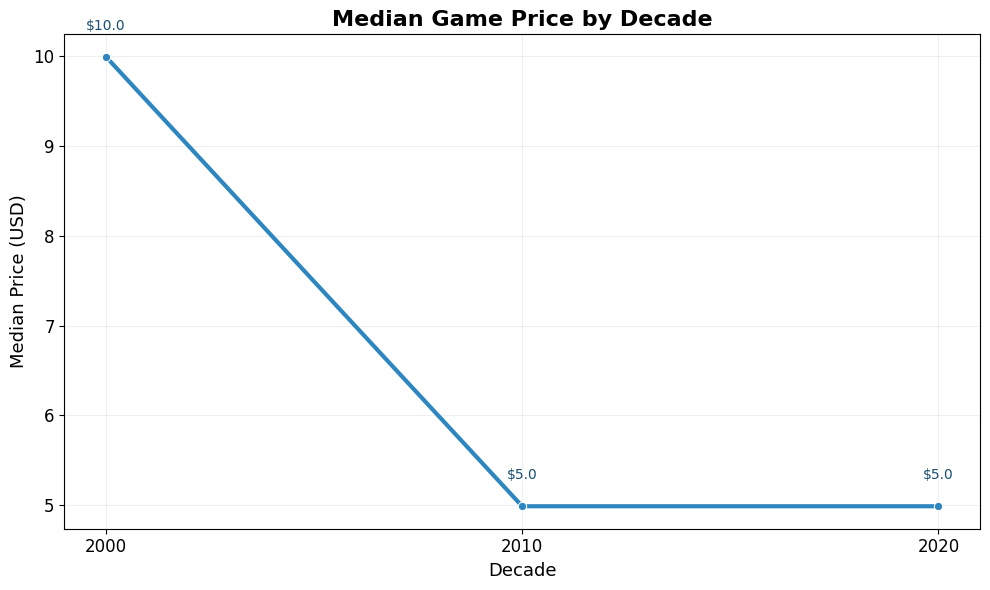

In [14]:
price_trend = (
    df.dropna(subset=['price', 'decade'])
      .groupby('decade')['price_usd']
      .median()
      .reset_index()
)
# Remove decades with unrealistic or extremely low sample size
decade_counts = df.groupby('decade')['price_usd'].count().reset_index(name='count')
price_trend = price_trend.merge(decade_counts, on='decade')
price_trend = price_trend[price_trend['count'] >= 20]  

plt.figure(figsize=(10,6))

sns.lineplot(
    data=price_trend,
    x='decade',
    y='price_usd',
    marker='o',
    linewidth=3,
    color="#2E86C1"
)

# Add value labels above points
for _, row in price_trend.iterrows():
    plt.text(
        row['decade'], 
        row['price_usd'] + 0.3, 
        f"${row['price_usd']:.1f}",
        ha='center',
        fontsize=10,
        color='#1B4F72'
    )

plt.title("Median Game Price by Decade", fontsize=16, fontweight='bold')
plt.xlabel("Decade", fontsize=13)
plt.ylabel("Median Price (USD)", fontsize=13)

plt.xticks(price_trend['decade'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(fig_dir/"Price by decade.png")
plt.show()

In [10]:
# Inspecting price_trend
try:
    print("price_trend:\n", price_trend)
    print("\ndecade_counts:\n", decade_counts)
except NameError:
    print("price_trend or decade_counts not defined in the current kernel. Re-running the price trend cell then printing results.")
    # Recompute price_trend as in the original cell
    price_trend = (
        df.dropna(subset=['price_usd', 'decade'])
          .groupby('decade')['price_usd']
          .median()
          .reset_index()
    )
    decade_counts = df.groupby('decade')['price_usd'].count().reset_index(name='count')
    price_trend = price_trend.merge(decade_counts, on='decade')
    price_trend = price_trend[price_trend['count'] >= 20]
    print("price_trend:\n", price_trend)
    print("\ndecade_counts:\n", decade_counts)

price_trend or decade_counts not defined in the current kernel. Re-running the price trend cell then printing results.
price_trend:
    decade  price_usd  count
1    2000       9.99     98
2    2010       4.99  28907
3    2020       4.99  60610

decade_counts:
    decade  count
0    1990      3
1    2000     98
2    2010  28907
3    2020  60610


#### Platform-wise Positive Reviews Comparison

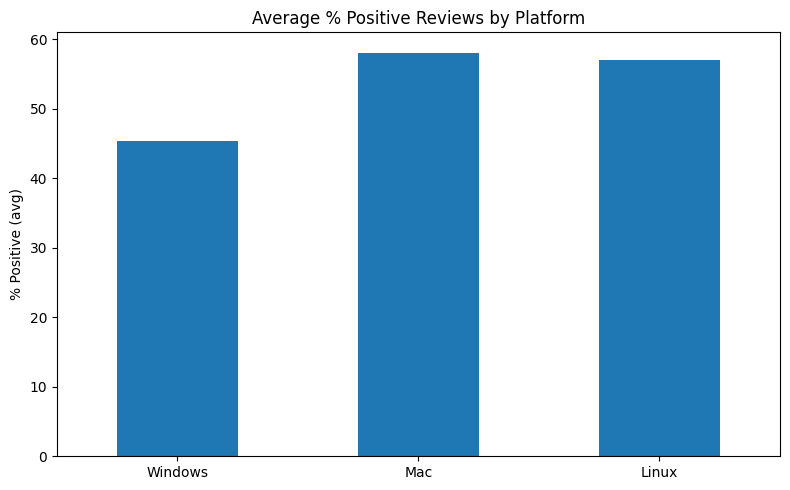

In [18]:
# Platform Comparison
platform_summary = pd.DataFrame({
    'avg_pct_pos': [
        df[df['windows_support']]['pct_pos_total'].mean(),
        df[df['mac_support']]['pct_pos_total'].mean(),
        df[df['linux_support']]['pct_pos_total'].mean()
    ]
}, index=['Windows','Mac','Linux'])

platform_summary['avg_pct_pos'].plot(kind='bar', figsize=(8,5))
plt.title("Average % Positive Reviews by Platform")
plt.ylabel("% Positive (avg)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(fig_dir/"Platform-wise Positive Reviews.png")
plt.show()

#### Price Bins vs Sentiment

C:\Users\mahan\AppData\Local\Temp\ipykernel_5868\763180601.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bin_stats = df.groupby('price_bin').agg(mean_pct_pos=('pct_pos_total','mean'), count=('name','count')).dropna()


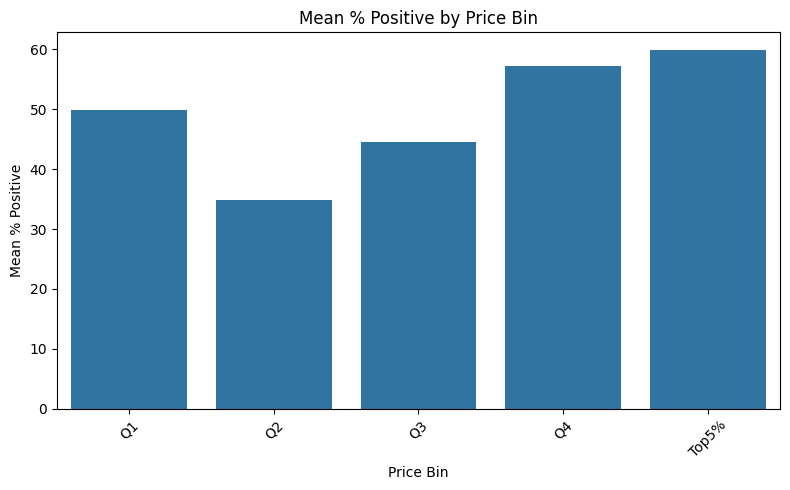

In [14]:
plt.figure(figsize=(8,5))
price_bin_stats = df.groupby('price_bin').agg(mean_pct_pos=('pct_pos_total','mean'), count=('name','count')).dropna()
sns.barplot(x=price_bin_stats.index.astype(str), y='mean_pct_pos', data=price_bin_stats)
plt.title("Mean % Positive by Price Bin")
plt.xlabel("Price Bin")
plt.ylabel("Mean % Positive")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(fig_dir/"Pricebin_pctpos.png")
plt.show()

#### DLC vs Sentiment

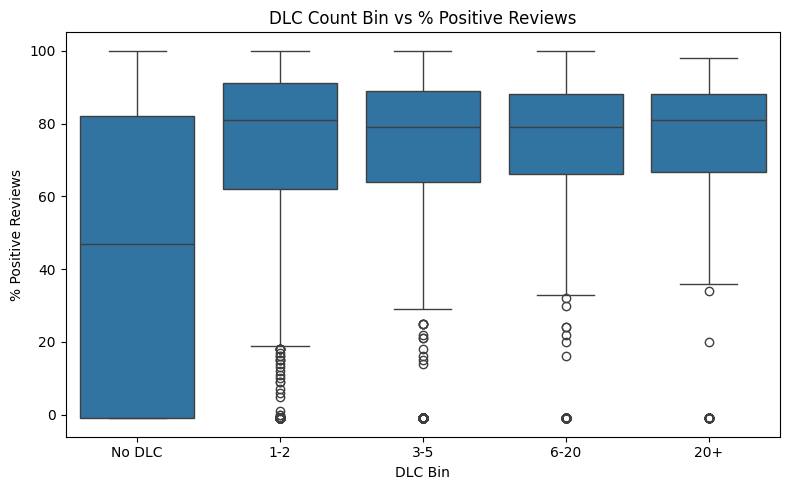

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='dlc_bin', y='pct_pos_total')
plt.title("DLC Count Bin vs % Positive Reviews")
plt.xlabel("DLC Bin")
plt.ylabel("% Positive Reviews")
plt.tight_layout()
plt.savefig(fig_dir/"DLC_pctpos.png")
plt.show()

#### Price Trend Over The Decade

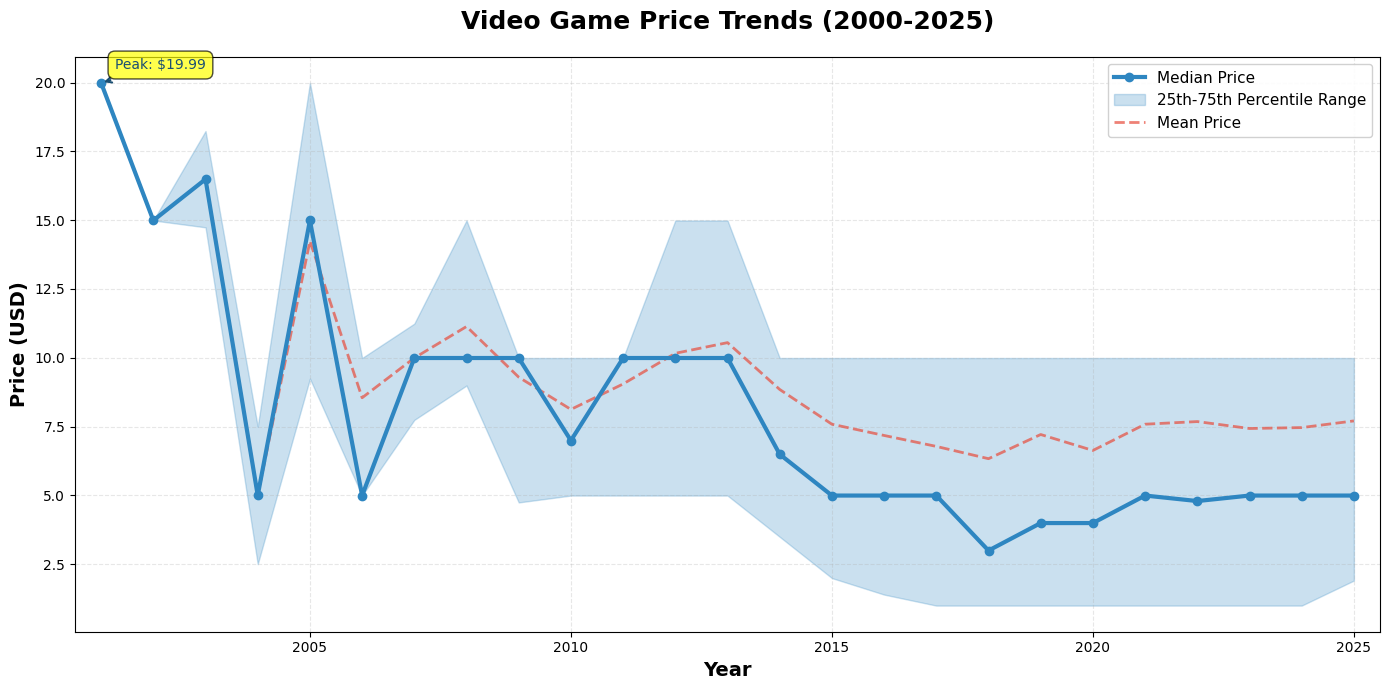


 Price Trend Over the Decades:
   Highest Median Price: $19.99 in 2001
   Lowest Median Price: $2.99 in 2018
   Current Median (2025): $4.99
   Overall Trend: Decreasing


In [14]:
# Price Trend Over Years - Enhanced Visualization
fig, ax = plt.subplots(figsize=(14, 7))

# Prepare data
price_by_year = df.dropna(subset=['price_usd', 'year'])
price_by_year = price_by_year[price_by_year['year'] >= 2000]  # Focus on recent decades

# Calculate statistics per year
yearly_stats = price_by_year.groupby('year')['price_usd'].agg([
    ('median', 'median'),
    ('q25', lambda x: x.quantile(0.25)),
    ('q75', lambda x: x.quantile(0.75)),
    ('mean', 'mean')
]).reset_index()

# Plot median line with shaded quartile range
ax.plot(yearly_stats['year'], yearly_stats['median'], 
        color='#2E86C1', linewidth=3, marker='o', markersize=6, 
        label='Median Price', zorder=3)

# Add shaded area for 25th-75th percentile range
ax.fill_between(yearly_stats['year'], 
                yearly_stats['q25'], 
                yearly_stats['q75'],
                alpha=0.25, color='#2E86C1', label='25th-75th Percentile Range')

# Optional: Add mean line
ax.plot(yearly_stats['year'], yearly_stats['mean'], 
        color='#E74C3C', linewidth=2, linestyle='--', 
        label='Mean Price', alpha=0.7)

# Formatting
ax.set_title("Video Game Price Trends (2000-2025)", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=14, fontweight='bold')
ax.set_ylabel("Price (USD)", fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(yearly_stats['year'].min() - 0.5, yearly_stats['year'].max() + 0.5)

# Add annotations for interesting points
max_median_year = yearly_stats.loc[yearly_stats['median'].idxmax()]
min_median_year = yearly_stats.loc[yearly_stats['median'].idxmin()]

ax.annotate(f'Peak: ${max_median_year["median"]:.2f}',
            xy=(max_median_year['year'], max_median_year['median']),
            xytext=(10, 10), textcoords='offset points',
            fontsize=10, color='#1B4F72',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='#1B4F72', lw=1.5))

plt.tight_layout()
plt.savefig(fig_dir/"Price_trend_over_years.png", dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"\n Price Trend Over the Decades:")
print(f"   Highest Median Price: ${max_median_year['median']:.2f} in {int(max_median_year['year'])}")
print(f"   Lowest Median Price: ${min_median_year['median']:.2f} in {int(min_median_year['year'])}")
print(f"   Current Median (2025): ${yearly_stats[yearly_stats['year'] == 2025]['median'].values[0]:.2f}" if 2025 in yearly_stats['year'].values else "")
print(f"   Overall Trend: {'Increasing' if yearly_stats['median'].iloc[-1] > yearly_stats['median'].iloc[0] else 'Decreasing'}")

#### Metacritic VS User Sentiment

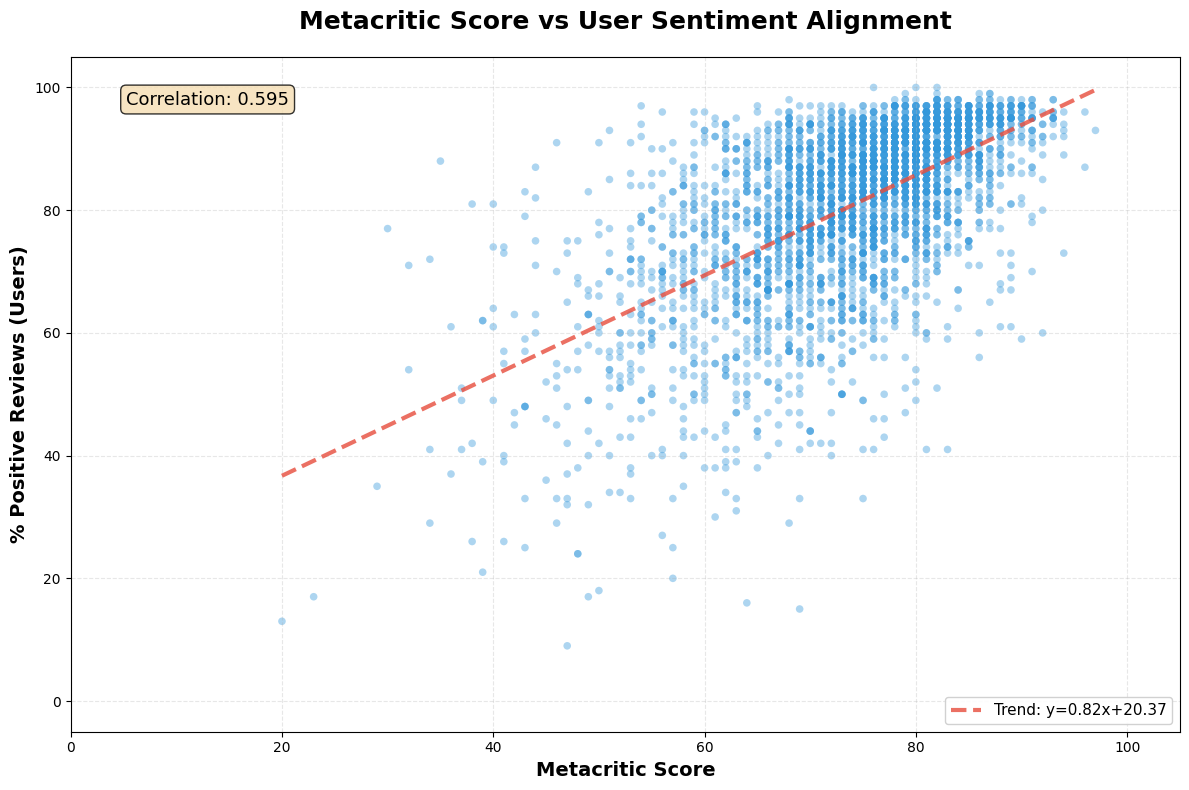


 Metacritic Score vs User Sentiment Analysis:
   Total games analyzed: 3,512
   Correlation coefficient: 0.595
   Interpretation: Moderate positive correlation
   Average Metacritic Score: 73.5
   Average User Positive %: 80.4%


In [ ]:
# Metacritic vs User Sentiment - Enhanced Visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Filter data: remove games with 0 or missing metacritic scores, and require meaningful review counts
sub2 = df.dropna(subset=['metacritic_score', 'pct_pos_total'])
sub2 = sub2[(sub2['metacritic_score'] > 0) & (sub2['num_reviews_total'] >= 10)]

# Create scatter plot with better styling
scatter = ax.scatter(sub2['metacritic_score'], sub2['pct_pos_total'], 
                     alpha=0.4, s=30, c='#3498DB', edgecolors='none')

# Add trend line
z = np.polyfit(sub2['metacritic_score'], sub2['pct_pos_total'], 1)
p = np.poly1d(z)
ax.plot(sub2['metacritic_score'].sort_values(), 
        p(sub2['metacritic_score'].sort_values()),
        color='#E74C3C', linewidth=3, linestyle='--', 
        label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}', alpha=0.8)

# Calculate and display correlation
correlation = sub2['metacritic_score'].corr(sub2['pct_pos_total'])
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
        transform=ax.transAxes, fontsize=13, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Formatting
ax.set_title("Metacritic Score vs User Sentiment Alignment", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Metacritic Score", fontsize=14, fontweight='bold')
ax.set_ylabel("% Positive Reviews (Users)", fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(0, 105)
ax.set_ylim(-5, 105)

plt.tight_layout()
plt.savefig(fig_dir/"Metacritic_vs_user_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

# Display insights
print(f"\n Metacritic Score vs User Sentiment Analysis:")
print(f"   Total games analyzed: {len(sub2):,}")
print(f"   Correlation coefficient: {correlation:.3f}")
print(f"   Interpretation: {'Strong positive' if correlation > 0.7 else 'Moderate positive' if correlation > 0.4 else 'Weak'} correlation")
print(f"   Average Metacritic Score: {sub2['metacritic_score'].mean():.1f}")
print(f"   Average User Positive %: {sub2['pct_pos_total'].mean():.1f}%")

#### Multi-platform Supported Games

C:\Users\mahan\AppData\Local\Temp\ipykernel_668\2498709983.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='num_platforms', y='pct_pos_total', ax=axes[0],


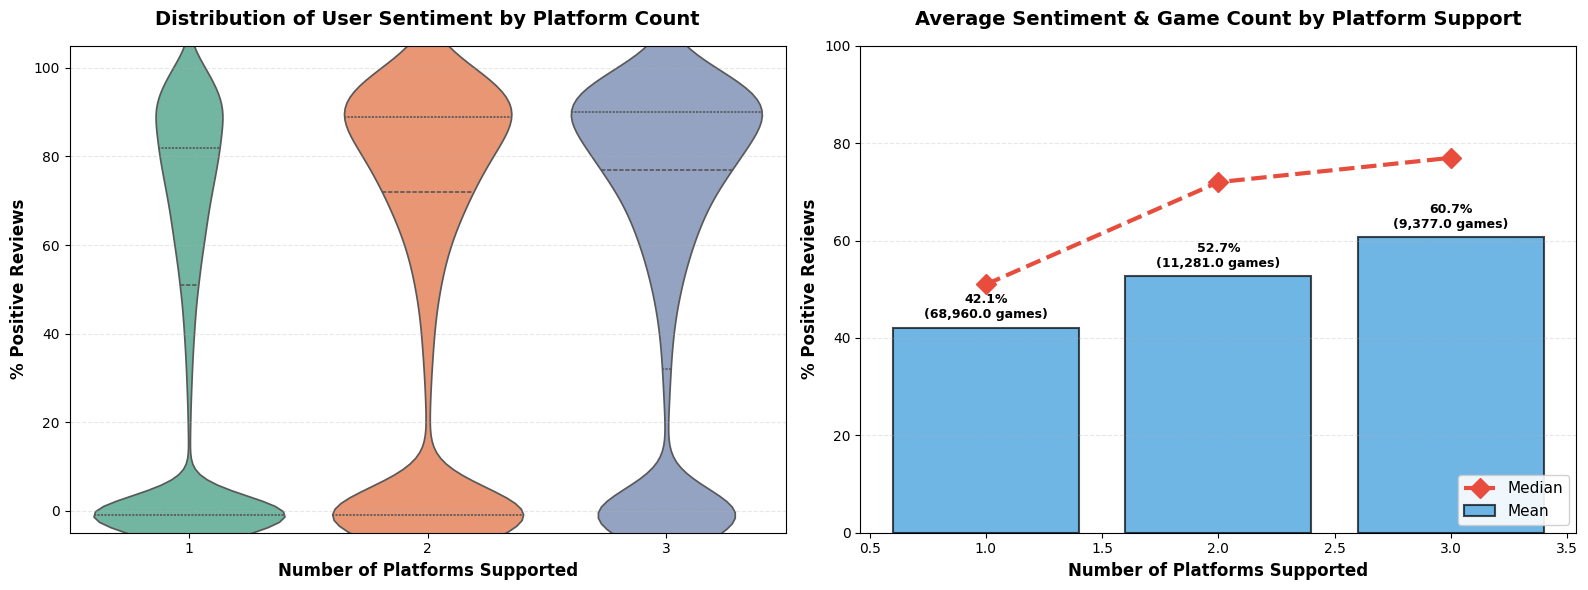


 Multi-Platform Support Analysis:

Platforms    Mean %     Median %   Game Count  
1               42.07%     51.00%      68,960
2               52.67%     72.00%      11,281
3               60.67%     77.00%       9,377

 Games supporting 3 platform(s) have the highest average sentiment (60.7%)


In [ ]:
df['num_platforms'] = df[['windows_support','mac_support','linux_support']].sum(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Violin plot showing distribution
sns.violinplot(data=df, x='num_platforms', y='pct_pos_total', ax=axes[0], 
               palette='Set2', inner='quartile')
axes[0].set_title("Distribution of User Sentiment by Platform Count", fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel("Number of Platforms Supported", fontsize=12, fontweight='bold')
axes[0].set_ylabel("% Positive Reviews", fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--', axis='y')
axes[0].set_ylim(-5, 105)

# Right plot: Bar chart with statistics
platform_stats = df.groupby('num_platforms').agg(
    mean_pct_pos=('pct_pos_total', 'mean'),
    median_pct_pos=('pct_pos_total', 'median'),
    count=('name', 'count')
).reset_index()

x_pos = platform_stats['num_platforms']
axes[1].bar(x_pos, platform_stats['mean_pct_pos'], 
            color='#3498DB', edgecolor='black', linewidth=1.5, alpha=0.7, label='Mean')
axes[1].plot(x_pos, platform_stats['median_pct_pos'], 
             color='#E74C3C', marker='D', markersize=10, linewidth=3, 
             linestyle='--', label='Median')

# Add value labels on bars
for i, (idx, row) in enumerate(platform_stats.iterrows()):
    axes[1].text(row['num_platforms'], row['mean_pct_pos'] + 2, 
                f"{row['mean_pct_pos']:.1f}%\n({row['count']:,} games)",
                ha='center', fontsize=9, fontweight='bold')

axes[1].set_title("Average Sentiment & Game Count by Platform Support", fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel("Number of Platforms Supported", fontsize=12, fontweight='bold')
axes[1].set_ylabel("% Positive Reviews", fontsize=12, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=11, framealpha=0.9)
axes[1].grid(True, alpha=0.3, linestyle='--', axis='y')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.savefig(fig_dir/"Platforms_support_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

# Print detailed statistics
print(f"\n Multi-Platform Support Analysis:")
print(f"\n{'Platforms':<12} {'Mean %':<10} {'Median %':<10} {'Game Count':<12}")
print("="*50)
for _, row in platform_stats.iterrows():
    platforms = int(row['num_platforms'])
    print(f"{platforms:<12} {row['mean_pct_pos']:>8.2f}% {row['median_pct_pos']:>9.2f}% {int(row['count']):>11,}")

print(f"\n Games supporting {platform_stats.loc[platform_stats['mean_pct_pos'].idxmax(), 'num_platforms']:.0f} platform(s) have the highest average sentiment ({platform_stats['mean_pct_pos'].max():.1f}%)")

#### Publisher Sentiment Change

In [1]:
# Publisher Sentiment Change Analysis - Enhanced Visualization
if df['pct_pos_recent'].notna().any():
    # Filter publishers with enough games for meaningful analysis
    pub_sent = df.groupby('publishers').agg(
        avg_total=('pct_pos_total','mean'),
        avg_recent=('pct_pos_recent','mean'),
        num_games=('name', 'count')
    ).dropna()
    
    # Only consider publishers with at least 5 games
    pub_sent = pub_sent[pub_sent['num_games'] >= 5]
    
    pub_sent['delta'] = pub_sent['avg_recent'] - pub_sent['avg_total']
    
    # Get top 10 improving and top 10 declining publishers
    top_improving = pub_sent.nlargest(10, 'delta')
    top_declining = pub_sent.nsmallest(10, 'delta')
    
    # Create dual visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left: Top Improving Publishers
    axes[0].barh(range(len(top_improving)), top_improving['delta'].values, 
                 color='#27AE60', edgecolor='black', linewidth=1.2)
    axes[0].set_yticks(range(len(top_improving)))
    axes[0].set_yticklabels(top_improving.index, fontsize=10)
    axes[0].set_xlabel("Sentiment Improvement (%)", fontsize=12, fontweight='bold')
    axes[0].set_title("Top 10 Publishers with Improving Sentiment", fontsize=14, fontweight='bold', pad=15)
    axes[0].grid(axis='x', alpha=0.3, linestyle='--')
    axes[0].invert_yaxis()
    
    # Add value labels
    for i, v in enumerate(top_improving['delta'].values):
        axes[0].text(v + 0.5, i, f'+{v:.1f}%', va='center', fontsize=9, fontweight='bold')
    
    # Right: Top Declining Publishers
    axes[1].barh(range(len(top_declining)), top_declining['delta'].values, 
                 color='#E74C3C', edgecolor='black', linewidth=1.2)
    axes[1].set_yticks(range(len(top_declining)))
    axes[1].set_yticklabels(top_declining.index, fontsize=10)
    axes[1].set_xlabel("Sentiment Decline (%)", fontsize=12, fontweight='bold')
    axes[1].set_title("Top 10 Publishers with Declining Sentiment", fontsize=14, fontweight='bold', pad=15)
    axes[1].grid(axis='x', alpha=0.3, linestyle='--')
    axes[1].invert_yaxis()
    
    # Add value labels
    for i, v in enumerate(top_declining['delta'].values):
        axes[1].text(v - 0.5, i, f'{v:.1f}%', va='center', ha='right', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(fig_dir/"Publisher_sentiment_changes.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print(f"\n Publisher Sentiment Analysis:")
    print(f"\n Most Improved Publishers:")
    for pub, row in top_improving.head(5).iterrows():
        print(f"   {pub}: +{row['delta']:.1f}% (from {row['avg_total']:.1f}% to {row['avg_recent']:.1f}%)")
    
    print(f"\n Most Declined Publishers:")
    for pub, row in top_declining.head(5).iterrows():
        print(f"   {pub}: {row['delta']:.1f}% (from {row['avg_total']:.1f}% to {row['avg_recent']:.1f}%)")
else:
    print("No recent sentiment data available.")

NameError: name 'df' is not defined